# Проектная работа по исследованию Яндекс.Недвижимости

**Описание проекта:**

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. К первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

**Цель проекта:**

Установить особенности и зависимости, которые оказывают влияние на стоимость недвижимости.

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных-и-изучение-общей-информации" data-toc-modified-id="Подготовка-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Устранение-неявных-дубликатов" data-toc-modified-id="Устранение-неявных-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устранение неявных дубликатов</a></span></li><li><span><a href="#Устранение-редких-и-выбивающихся-значений" data-toc-modified-id="Устранение-редких-и-выбивающихся-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устранение редких и выбивающихся значений</a></span><ul class="toc-item"><li><span><a href="#Рассмотрим-столбец-с-&quot;высотой-потолков&quot;" data-toc-modified-id="Рассмотрим-столбец-с-&quot;высотой-потолков&quot;-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Рассмотрим столбец с "высотой потолков"</a></span></li><li><span><a href="#Изучим-столбец-last_price-с-ценой-продажи-объекта" data-toc-modified-id="Изучим-столбец-last_price-с-ценой-продажи-объекта-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Изучим столбец last_price с ценой продажи объекта</a></span></li><li><span><a href="#Рассмотрим-столбец-total_area" data-toc-modified-id="Рассмотрим-столбец-total_area-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Рассмотрим столбец total_area</a></span></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Добавление новых столбцов</a></span><ul class="toc-item"><li><span><a href="#C-ценой-одного-квадратного-метра" data-toc-modified-id="C-ценой-одного-квадратного-метра-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>C ценой одного квадратного метра</a></span></li><li><span><a href="#С-днём-недели-публикации-объявления" data-toc-modified-id="С-днём-недели-публикации-объявления-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>С днём недели публикации объявления</a></span></li><li><span><a href="#С-месяцем-публикации-объявления" data-toc-modified-id="С-месяцем-публикации-объявления-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>С месяцем публикации объявления</a></span></li><li><span><a href="#С-годом-публикации-объявления" data-toc-modified-id="С-годом-публикации-объявления-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>С годом публикации объявления</a></span></li><li><span><a href="#С-типом-этажа-квартиры-(значения-—-первый»,-«последний»,-«другой»)" data-toc-modified-id="С-типом-этажа-квартиры-(значения-—-первый»,-«последний»,-«другой»)-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>С типом этажа квартиры (значения — первый», «последний», «другой»)</a></span></li><li><span><a href="#C-расстоянием-до-центра-города-в-километрах" data-toc-modified-id="C-расстоянием-до-центра-города-в-километрах-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>C расстоянием до центра города в километрах</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Цена-объекта" data-toc-modified-id="Цена-объекта-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Цена объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Тип-этажа" data-toc-modified-id="Тип-этажа-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Тип этажа</a></span></li><li><span><a href="#Общее-количество-этажей" data-toc-modified-id="Общее-количество-этажей-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Общее количество этажей</a></span></li><li><span><a href="#Расстояние-до-центра-города" data-toc-modified-id="Расстояние-до-центра-города-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Расстояние до центра города</a></span></li><li><span><a href="#Расстояние-до-ближайшего-аэропорта" data-toc-modified-id="Расстояние-до-ближайшего-аэропорта-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Расстояние до ближайшего аэропорта</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#День-недели-публикации-объявления" data-toc-modified-id="День-недели-публикации-объявления-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>День недели публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Как-быстро-продавались-квартиры" data-toc-modified-id="Как-быстро-продавались-квартиры-3.15"><span class="toc-item-num">3.15&nbsp;&nbsp;</span>Как быстро продавались квартиры</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта-3.16"><span class="toc-item-num">3.16&nbsp;&nbsp;</span>Какие факторы больше всего влияют на общую (полную) стоимость объекта</a></span></li><li><span><a href="#Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-3.17"><span class="toc-item-num">3.17&nbsp;&nbsp;</span>Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span><ul class="toc-item"><li><span><a href="#Получены-следующие-наблюдения-и-обнаружены-закономерности:" data-toc-modified-id="Получены-следующие-наблюдения-и-обнаружены-закономерности:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Получены следующие наблюдения и обнаружены закономерности:</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-жилья:" data-toc-modified-id="Факторы-влияющие-на-стоимость-жилья:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы влияющие на стоимость жилья:</a></span></li><li><span><a href="#Рейтинг-из-10-населённых-пунктов-с-наибольшим-числом-объявлений:" data-toc-modified-id="Рейтинг-из-10-населённых-пунктов-с-наибольшим-числом-объявлений:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Рейтинг из 10 населённых пунктов с наибольшим числом объявлений:</a></span></li><li><span><a href="#Зависимость-стоимости-жилья-от-удаленности-от-центра-города" data-toc-modified-id="Зависимость-стоимости-жилья-от-удаленности-от-центра-города-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Зависимость стоимости жилья от удаленности от центра города</a></span></li></ul></li></ul></div>

## Подготовка данных и изучение общей информации

Импортируем необходимые библиотеки и прочитаем файл

In [1]:
#Импортируем 2 библиотеки и применим метод read_csv для чтения датасета

import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('C:\\jupyter_project\\number2\\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Ознакомимся с данными

In [2]:
#Выведем первые 5 строк датасета

data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23008,8,2199000.0,39.0,2016-03-01T00:00:00,1,3.0,5.0,18.0,5,NaN,...,9.3,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,366.0
3135,12,5400000.0,62.0,2015-10-14T00:00:00,3,NaN,6.0,44.0,2,NaN,...,6.0,0.0,Красное Село,24723.0,28148.0,0.0,NaN,0.0,NaN,354.0
23215,9,6300000.0,45.0,2018-07-25T00:00:00,2,2.6,9.0,27.2,3,NaN,...,8.0,NaN,Санкт-Петербург,15503.0,7552.0,0.0,NaN,0.0,NaN,34.0
22745,16,5600000.0,59.0,2017-12-18T00:00:00,3,NaN,9.0,39.9,6,NaN,...,6.3,1.0,Санкт-Петербург,49839.0,15544.0,0.0,NaN,0.0,NaN,107.0
19783,12,3900000.0,49.0,2019-04-28T00:00:00,4,2.5,5.0,35.1,3,NaN,...,5.3,NaN,Санкт-Петербург,9976.0,12035.0,0.0,NaN,0.0,NaN,NaN


Изучим общую информацию о датасете

In [3]:
#Воспользуемся методом info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму

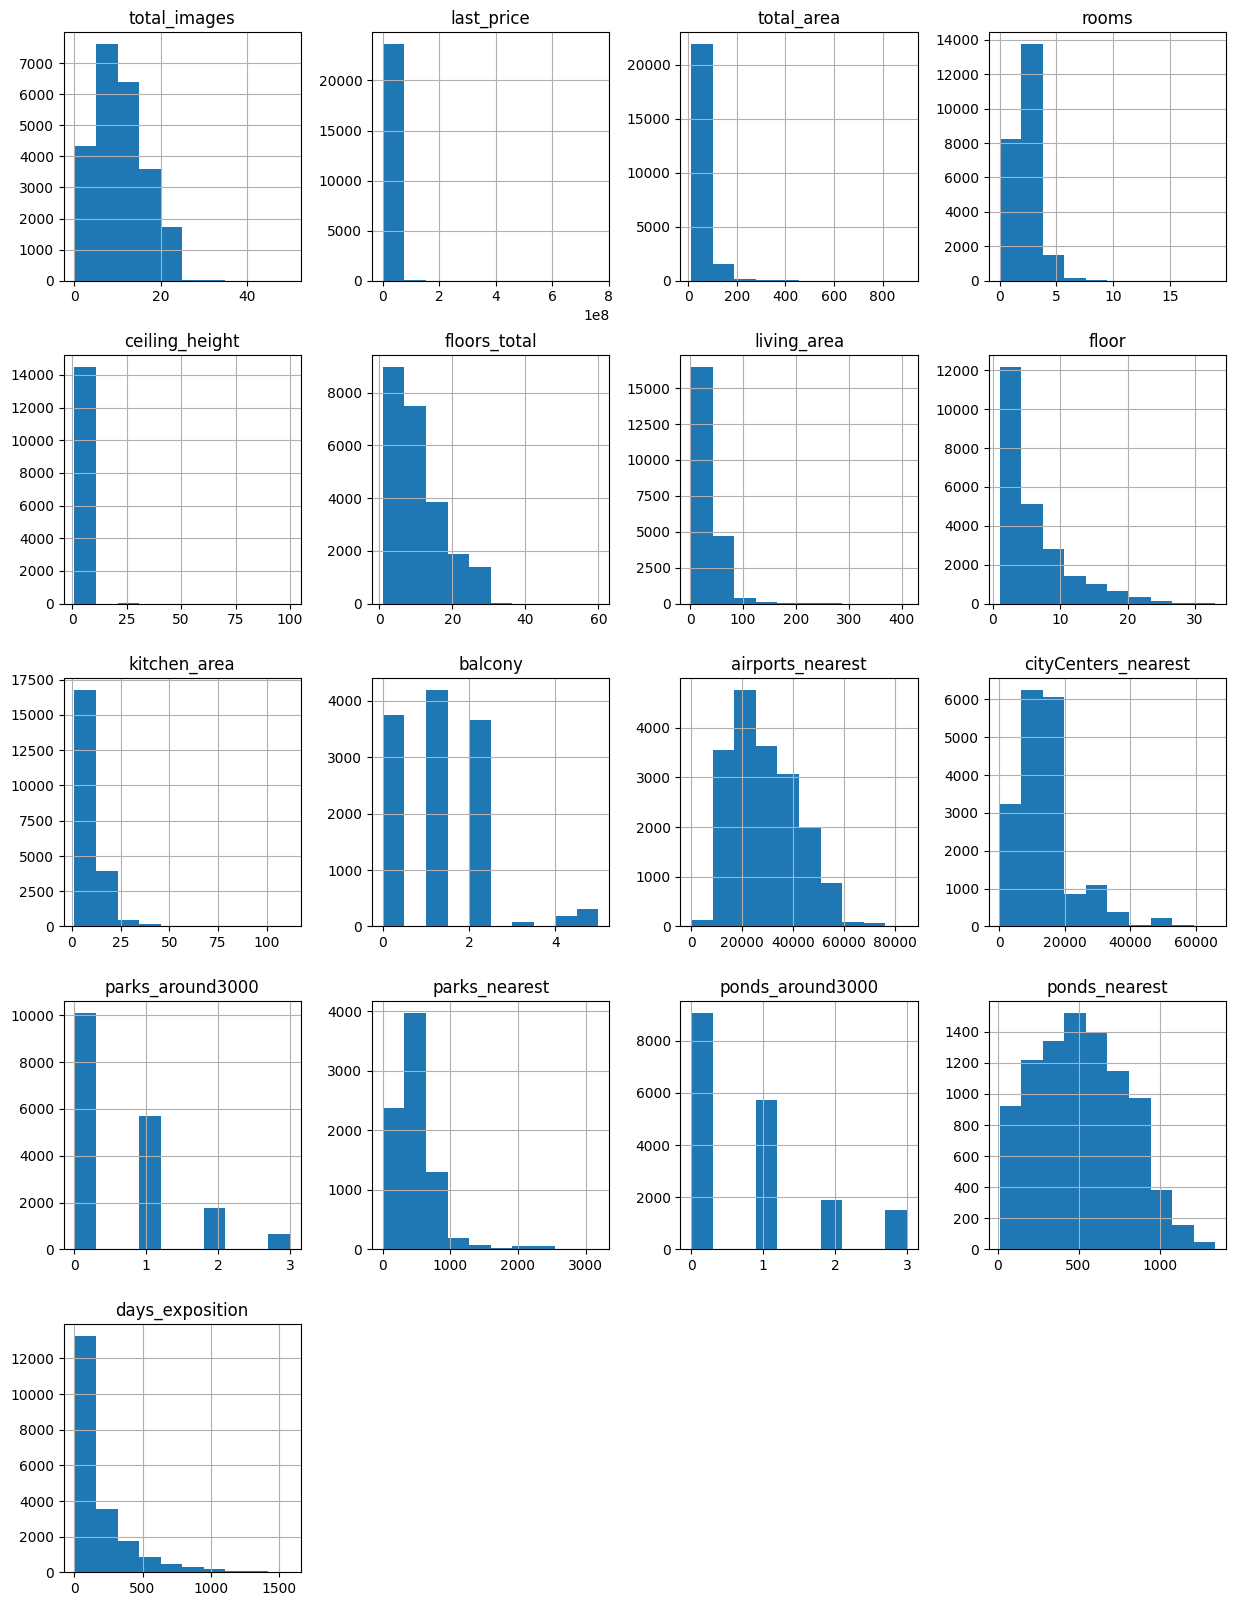

In [4]:
#Воспользуемся hist(), зададим размер 15х10

data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных

### Обработка пропущенных значений

Узнаем количество пропущенных значений

In [5]:
#Применим поочередно 2 метода к датафрейму

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропуски там, где это возможно

В столбце с высотой потолка заполним медианным зачением все пропуски

In [6]:
#С помощью логического условия выберем все пропуски и заполним медианой 

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

#Проверим,что пропуски заменены
data['ceiling_height'].isna().sum()

0

В столбце floors_total(всего этажей в доме) вряди ли можно заполнить пропуски корректно и их маленькое количество - 86. Это не повлияет на результаты. 
В living_area(жилая площадь) мы не можем вычислить значения пропусков, так что оставим без изменений.

Рассмотрим столбец is_apartment подробнее. Выведем первые 5 строк с пропусками

In [7]:
#Применим логическое условие "не равно пустым значениям"

data[~(data['is_apartment'].isna())].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.65,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
25,3,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23.0,39.0,18,False,...,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0
29,9,8600000.0,100.0,2016-04-09T00:00:00,3,2.65,19.0,52.0,15,False,...,11.0,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
36,13,3790000.0,45.0,2017-01-25T00:00:00,2,2.65,9.0,27.0,9,False,...,6.3,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0


In [8]:
#С помощью value_counts() узнаем какое количество каждых значений

data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Пропущенные значения правильнее будет заменить на False

In [9]:
#Для этого воспользуемся fillna() с аргументом False

data['is_apartment'] = data['is_apartment'].fillna(False)

#проверим замену пропусков

data['is_apartment'].isna().sum()

0

kitchen_area(площадь кухни) также оставим без изменений. Т.к. не сможем заполнить логической заменой или математической

В столбце balcony если продавец не указал число балконов, то, скорее всего, в квартире их нет. Такие пропуски заменим на 0.

In [10]:
#В fillna() укажем аргумент 0

data['balcony'] = data['balcony'].fillna(0)

#Проверим,что пропуски заменены

data['balcony'].isna().sum()

0

locality_name(название населенного пункта) оставим без изменений.

Рассмотрим какие данные по пропускам в столбце "расстояние до аэропорта"

In [11]:
#Выведем последние 10 строк

data[data['airports_nearest'].isna()].tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23666,9,8150000.0,80.0,2016-04-17T00:00:00,3,2.65,17.0,44.9,12,False,...,11.4,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,286.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23677,8,2450000.0,35.0,2018-10-26T00:00:00,1,2.60,5.0,18.0,4,False,...,9.6,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23682,11,2350000.0,35.6,2016-06-23T00:00:00,1,2.50,5.0,17.0,4,False,...,8.3,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,False,...,5.5,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,2.65,5.0,17.5,4,False,...,6.0,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,8.5,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23698,4,1350000.0,32.3,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,False,...,9.0,0.0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод:

- основная масса с пропусками это населенные пункты за Санкт-Петербургом. Данные подтянуть неоткуда и заменить нечем. Пропустим этот столбец и следующие: cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition по той же причине.
- причины пропусков: человеческий фактор при подаче объявления (не указано наличие балконов, жилая площадь и тд.), ошибки при объединении данных (данных пользователя и картографических);

### Изменение типов данных

Найдем столбцы, в которых необходимо изменить формат и преобразуем в нужный тип данных

In [12]:
#Переведем столбец first_day_exposition в формат datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
#Переведем столбец floors_total в формат int64

data['balcony'] = data['balcony'].astype('int')

In [14]:
#И проверим как поменялись форматы

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Вывод: 
- для последующих операций с столбом first_day_exposition изменил формат на подходящий по причине того, что с форматом object невозможно произвести математических операций. 
- по столбцу balcony изменил на целочисленное, т.к. балконы не могут быть дробные и потому что визуальнее более читабельно. 
- по остальным столбцам не менял на int64, т.к. есть пропуски.

### Устранение неявных дубликатов

Изучим столбец с названиями населенных пунктов

In [15]:
#Воспользуемся методом unique()

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что встречаются одни и те же названия, но в первом варианте "посёлок", во втором "поселок". Заменим неявные дубликаты.

In [16]:
#C помощью str.replace() 

data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')

Заменим оставшиеся дубликаты

In [17]:
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 
                                                      'поселок городского типа Лесогорский')

In [18]:
data['locality_name'] = data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')

In [19]:
data['locality_name'] = data['locality_name'].replace('поселок Гарболово', 'деревня Гарболово')

In [20]:
data['locality_name'] = data['locality_name'].replace('поселок Зимитицы', 'деревня Зимитицы')

In [21]:
data['locality_name'] = data['locality_name'].replace('поселок Калитино', 'деревня Калитино')

In [22]:
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

In [23]:
data['locality_name'] = data['locality_name'].replace('коттеджный поселок Лесное', 'поселок Лесное')

In [24]:
data['locality_name'] = data['locality_name'].replace('Любань', 'поселок Любань')

In [25]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')

In [26]:
data['locality_name'] = data['locality_name'].replace('деревня Рабитицы', 'поселок Рабитицы')

In [27]:
data['locality_name'] = data['locality_name'].replace('поселок станции Вещево', 
                                                      'поселок при железнодорожной станции Вещево')

In [28]:
data['locality_name'] = data['locality_name'].replace('поселок станции Приветнинское', 
                                                      'поселок при железнодорожной станции Приветнинское')

In [29]:
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское', 'городской поселок Фёдоровское')

In [30]:
data['locality_name'] = data['locality_name'].replace('деревня Щеглово', 'поселок Щеглово')

In [31]:
#Произведем проверку

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'городской поселок Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сл

### Устранение редких и выбивающихся значений

#### Рассмотрим столбец с "высотой потолков"

In [32]:
#С помощью unique() выведем все уникальные значения

data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Видим, что встречаются явно некооректные значения. А также те, где совершена ошибка в заполнении/ выгрузке данных.

Исправим ошибочные значения

In [33]:
#Используем replace() для замены одного аргумента на другой

data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(20, 2)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5)

Изучим выбросы. Построим диграмму размаха

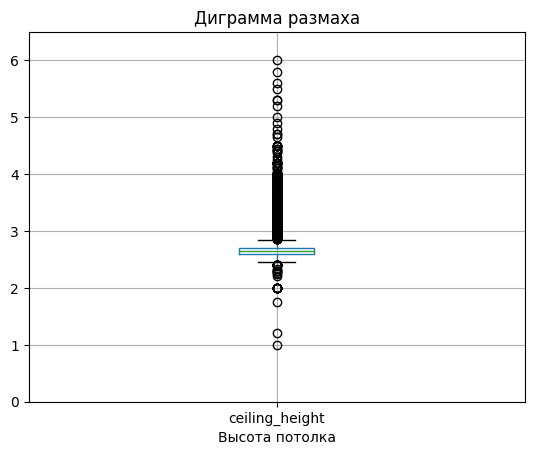

In [34]:
#Применим boxplot() к столбцу ceiling_height и укажем дополнительные параметры вывода
#с помощью библиотеки matplotlib

data.boxplot('ceiling_height')
plt.title('Диграмма размаха')
plt.xlabel('Высота потолка')
plt.ylim(0, 6.5)
plt.show()

Удалим аномально низкие и высокие значения

In [35]:
#Напишем цикл, который по каждому значению из столбца ищет совпадения в списке
#[1, 5.2, 6, 10.3, 1.75, 5.6, 1.2, 8.3, 5.5, 5.3, 8, 5.8, 14, 5, 100] и переписывает датасет без этих значений

for i in data['ceiling_height']:
    if i in [1, 5.2, 6, 10.3, 1.75, 5.6, 1.2, 8.3, 5.5, 5.3, 8, 5.8, 14, 5, 100]:
        data = data[data['ceiling_height'] != i]

Посмотрим на полученные результаты через гистограмму

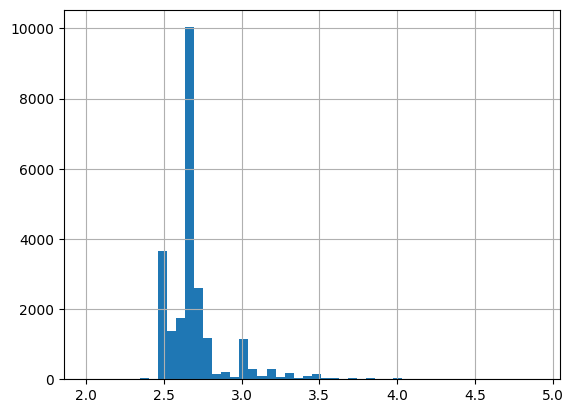

In [36]:
#Применим hist()

data['ceiling_height'].hist(bins=50)
plt.show()

Зафиксируем нюансы распределения в числах

In [37]:
#Применим describe() 

data['ceiling_height'].describe()

count    23681.000000
mean         2.695947
std          0.215216
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

Уменьшим диапазон до наиболее распространненых

In [38]:
#Воспользуемся query(), отфильтруем потолки ниже 3.6 и выше 2.4 и выведем уникальные значения

data = data.query('2.4 < ceiling_height < 3.6')
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 2.47, 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54, 2.51,
       2.78, 2.76, 2.58, 2.52, 2.87, 2.66, 2.59, 2.45, 2.92, 3.11, 3.13,
       3.15, 3.55, 3.16, 3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 2.94,
       3.54, 3.53, 2.83, 3.38, 3.01, 3.18, 3.35, 3.57, 2.48, 2.62, 2.82,
       2.63, 3.52, 2.88, 3.24, 3.36, 3.08, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33,
       3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.23, 3.02, 3.21, 3.43, 3.39,
       2.69, 3.31, 3.56, 3.51, 3.42, 2.99, 3.49, 2.91, 3.29, 2.89, 3.58,
       2.49, 3.48, 3.59])

#### Изучим столбец last_price с ценой продажи объекта 

Исходя из гистограммы по цене продажи, видим что есть аномальные значения. Рассмотрим более детально

In [39]:
#Построим сводную таблицу по цене продажи, в значениях укажем количество таких значений

data.pivot_table(index='last_price', values='total_images', aggfunc='count')

,total_images
last_price,
12190.0,1
430000.0,2
440000.0,1
450000.0,4
470000.0,3
...,...
300000000.0,1
330000000.0,1
401300000.0,1


Из сводной таблицы видно, что есть выбивающееся значение 12190. Удалим строку с ним.

In [40]:
#Применим логическое условие для перезаписи датасета без этого значения

data = data[data['last_price'] != 12190]

Изучим выбросы. Построим диграмму размаха

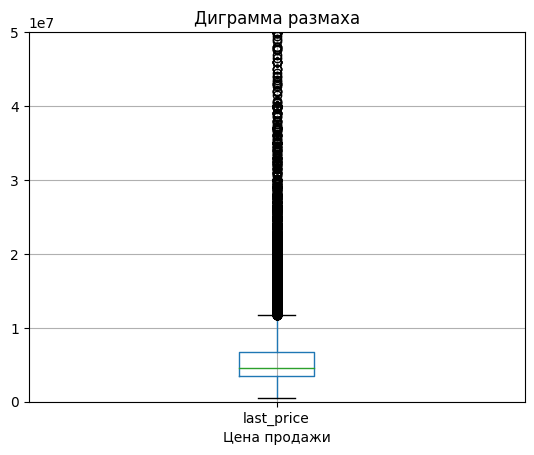

In [41]:
#Применим boxplot() к столбцу last_price и укажем дополнительные параметры вывода
#с помощью библиотеки matplotlib

data.boxplot('last_price')
plt.title('Диграмма размаха')
plt.xlabel('Цена продажи')
plt.ylim(0, 50000000)
plt.show()

Зафиксируем нюансы распределения в числах

In [42]:
#Применим describe() 

data['last_price'].describe()

count    2.341100e+04
mean     6.383734e+06
std      1.039015e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [43]:
#Считаем 1,5 межквартильного размаха

(6.700000e+06 - 3.400000e+06)*1.5

4950000.0

Левый ус упирается в 0, посчитаем правый ус: 1,5 квартиля + значение третьего квартиля

In [44]:
6.700000e+06 + 4950000.0

11650000.0

Отфильтруем датасет, исключая выбросы. Не будем удалять значения только исходя из диаграммы размаха,иначе удалим и дорогую недвижимость, например,которая находится в центре города. Возьмем условную границу в 21 млн.

In [45]:
#Применим логическую фильтрацию

data = data[data['last_price'] <= 21000001]

Построим гистограмму

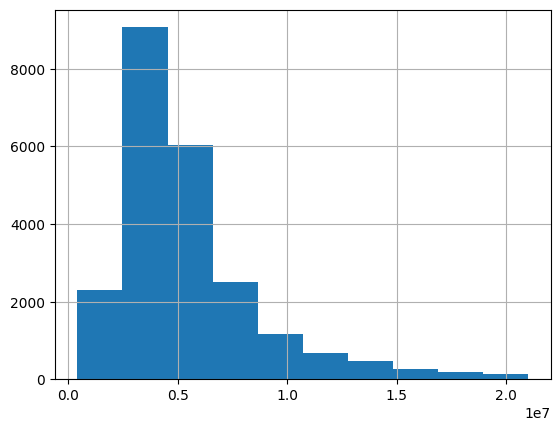

In [46]:
data['last_price'].hist()
plt.show()

#### Рассмотрим столбец total_area

In [47]:
#Построим сводную таблицу по общей площади, в значениях укажем количество таких значений

data.pivot_table(index='total_area', values='total_images', aggfunc='count')

,total_images
total_area,
12.0,1
13.0,3
13.2,1
14.0,1
15.0,2
...,...
263.8,1
287.5,1
309.7,1


Изучим выбросы. Построим диграмму размаха

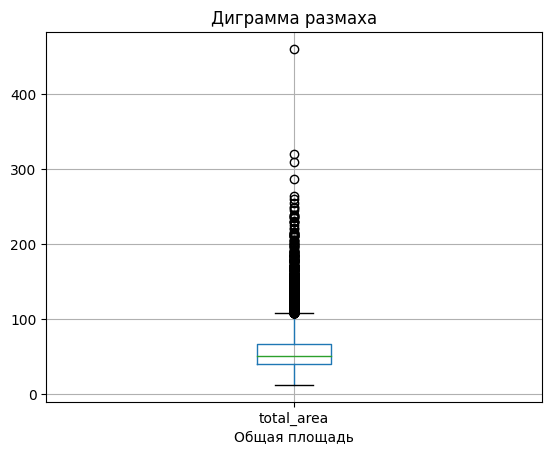

In [48]:
#Применим boxplot() к столбцу total_area и укажем дополнительные параметры вывода
#с помощью библиотеки matplotlib

data.boxplot('total_area')
plt.title('Диграмма размаха')
plt.xlabel('Общая площадь')
plt.show()

Отфильтруем датасет, исключая выбросы

In [49]:
#Применим логическую фильтрацию

data = data[data['total_area'] < 100]

In [50]:
data = data[data['total_area'] > 15]

Построим гистограмму

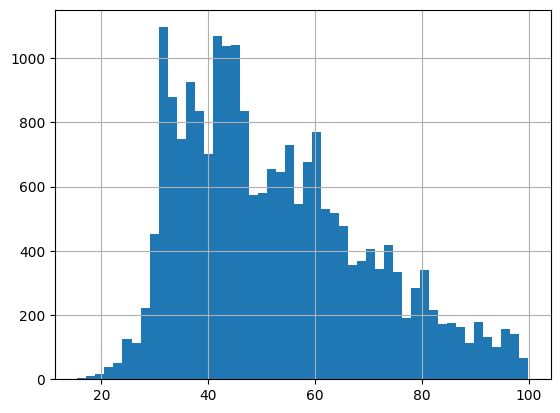

In [51]:
data['total_area'].hist(bins=50)
plt.show()

Квартир с площадью до 24м2 мало, удалим и их.

In [52]:
data = data[data['total_area'] > 23]

Вывод:

- удаление данных затронуло не более 10%
- обнаруженные ошибки связаны с человеческим фактором при заполнении данных. Также в выборку могла попасть коммерческая недвижимость, производственные помещения, чем объяснются значения, например с высокими потолками. В диапазон с высокими ценами могла попасть "элитная недвижимость" или имеющая какую-то историческую значимость.

### Добавление новых столбцов

#### C ценой одного квадратного метра

In [53]:
#Поделим цену продажи на общую площадь и округлим

data['price_square_meter'] = round(data['last_price'] / data['total_area'])

#### С днём недели публикации объявления

In [54]:
#Применим к дате первого размещения объявления dt.weekday

data['day_week'] = data['first_day_exposition'].dt.weekday

#### С месяцем публикации объявления

In [55]:
data['month'] = data['first_day_exposition'].dt.month

#### С годом публикации объявления

In [56]:
data['year'] = data['first_day_exposition'].dt.year

#### С типом этажа квартиры (значения — первый», «последний», «другой»)

In [57]:
#Для этого сначала создадим новый столбец с наименованием групп и заполним его значением "другой"

data['group_floor'] = 'другой'

#Далее с помощью функции where поочередно заполним значениями где этаж первый, а потом где последний

data['group_floor'] = data['group_floor'].where(data['floor'] != data['floors_total'], 'последний')
data['group_floor'] = data['group_floor'].where(data['floor'] != 1, 'первый')

#### C расстоянием до центра города в километрах

In [58]:
#Поделим расстояние до центра города в метрах на 1000 и округлим

data['cityCenters_nearest_in_km'] = round(data['cityCenters_nearest'] / 1000)

## Исследовательский анализ данных

Изучим следующие параметры объектов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

### Общая площадь

Построим гистограмму по общей площади

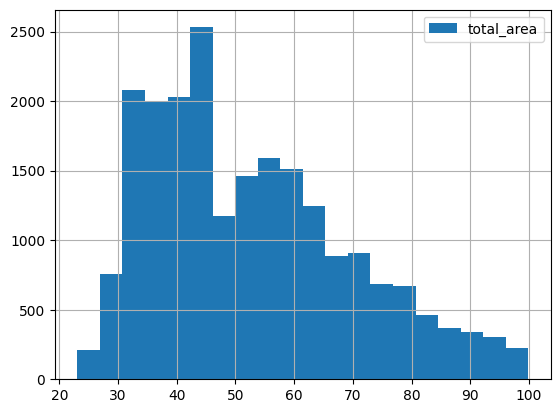

In [59]:
#Применим hist() к "total_area"

data['total_area'].hist(bins=20, legend=True)
plt.show()

Больше всего представлены объекты в районе 42 -45м2.

### Жилая площадь

Построим гистограмму по жилой площади*

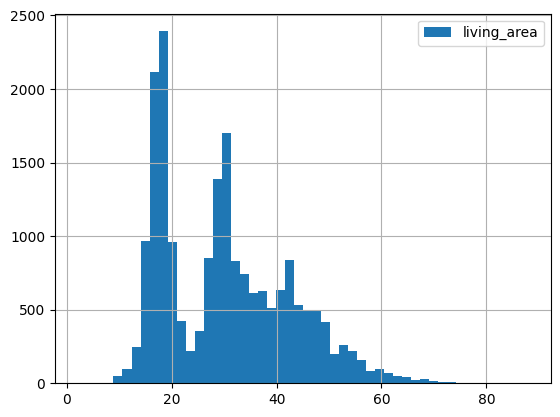

In [60]:
#Применим hist() к "living_area"

data['living_area'].hist(bins=50, legend=True)
plt.show()

Самые распространенные форматы с жилой площадью в 15-19м2, 27-35м2 и 40-42м2. Что сопоставимо со средними одно-,двух- и трехкомнатными объектами.

### Площадь кухни

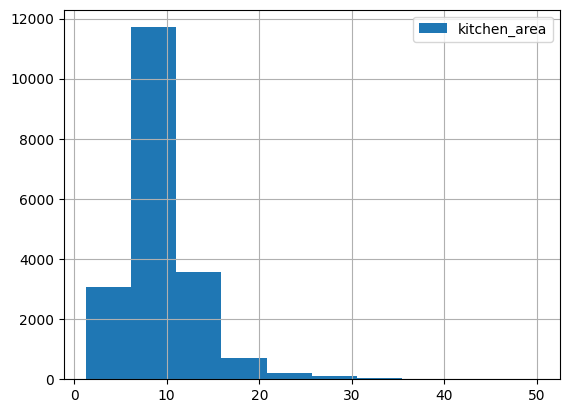

In [61]:
#Гистограмма по площади кухни

data['kitchen_area'].hist(legend=True)
plt.show()

Типовый размер кухни от 6 до 11м2.

### Цена объекта

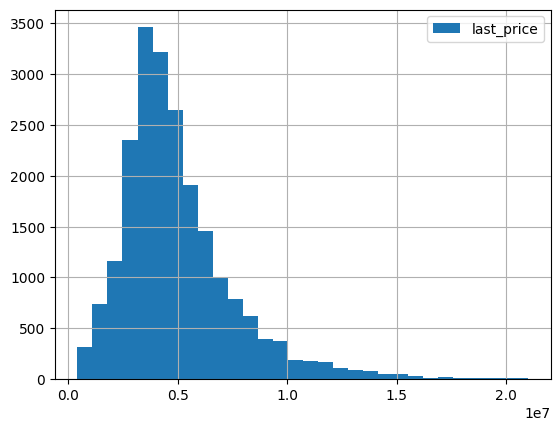

In [62]:
#Гистограмма по цене объекта

data['last_price'].hist(bins=30, legend=True)
plt.show()

Наиболее типичнная цена объекта в диапазоне 3- 4,7 млн.рублей

### Количество комнат

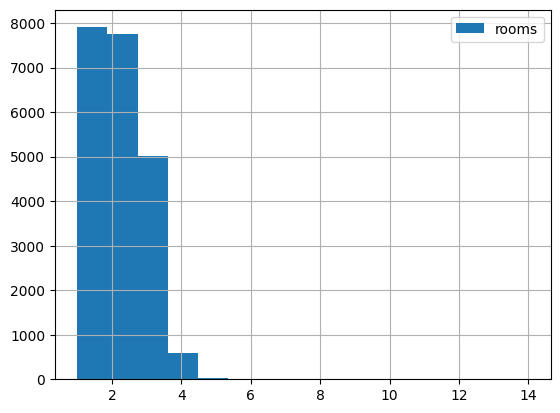

In [63]:
#Гистограмма по количеству комнат

data['rooms'].hist(bins=15, range=(1, 14), legend=True)
plt.show()

Одно- , двух- и трехкомнатные самые востребованные. Что подтверждается гистограммой по общей и жилой площади

### Высота потолков

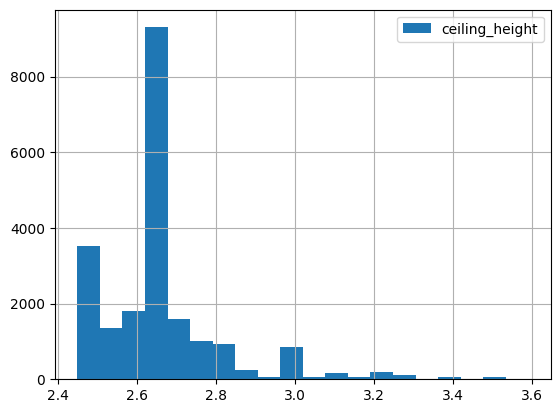

In [64]:
#Гистограмма по высоте потолков

data['ceiling_height'].hist(bins=20, legend=True)
plt.show()

Золотой стандарт - потолки высотой 2.65 м.

### Этаж

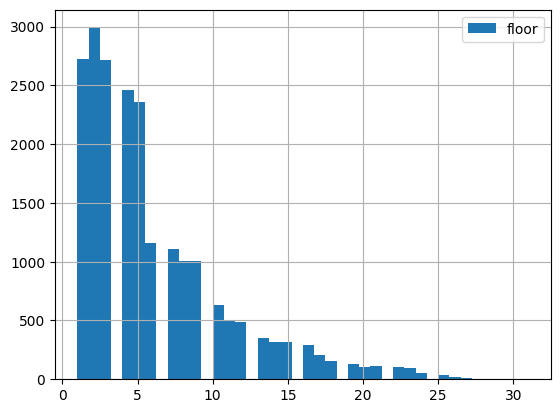

In [65]:
#Гистограмма по этажам квартир

data['floor'].hist(bins=40, legend=True)
plt.show()

Чаще всего продаются объекты с 1-го по 5-й этаж включительно

### Тип этажа

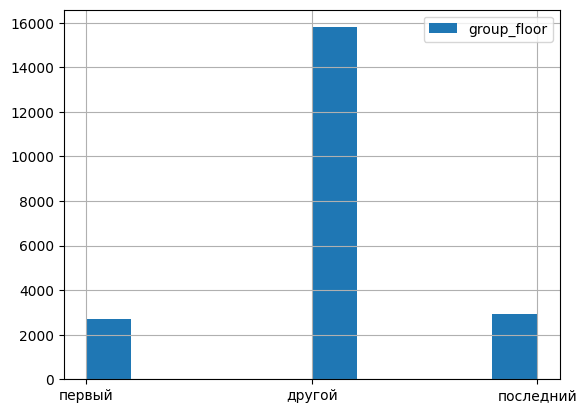

In [66]:
#Гистограмма по типу этажа квартиры («первый», «последний», «другой»)

data['group_floor'].hist(legend=True)
plt.show()

Квартир на первом и последнем продавалось равное количество.

### Общее количество этажей

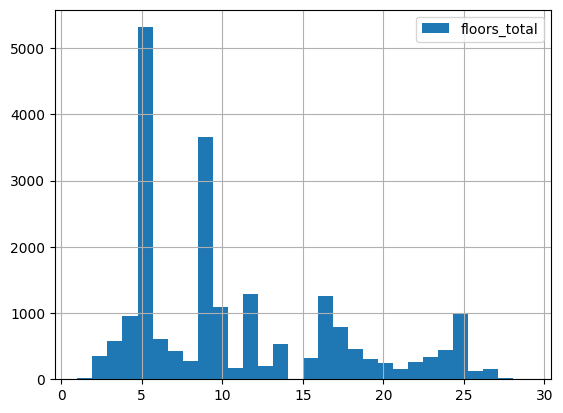

In [67]:
#Гистограмма по общему количеству этажей в доме

data['floors_total'].hist(bins=30, range=(1, 29), legend=True)
plt.show()

Преобладают пяти-, девятиэтажные здания

### Расстояние до центра города

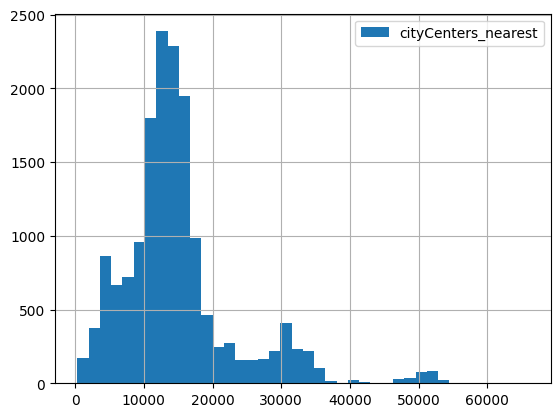

In [68]:
#Гистограмма по расстоянию до центра города в метрах

data['cityCenters_nearest'].hist(bins=40, legend=True)
plt.show()

Наиболее распространены объекты в 10-17 км от центра города. Но так как много пропущенных значений, то выводы могут быть не точными.

### Расстояние до ближайшего аэропорта

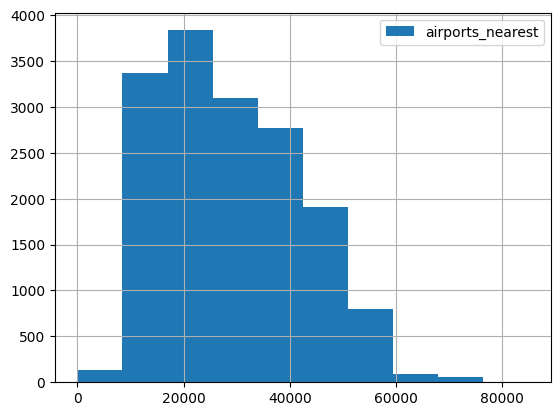

In [69]:
#Гистограмма по расстоянию до ближайшего аэропорта

data['airports_nearest'].hist(legend=True)
plt.show()

В среднем аэропорт находится на расстоянии от 10 до 25 км. Но так как есть пропущенные значения, то выводы могут быть не точными.

### Расстояние до ближайшего парка

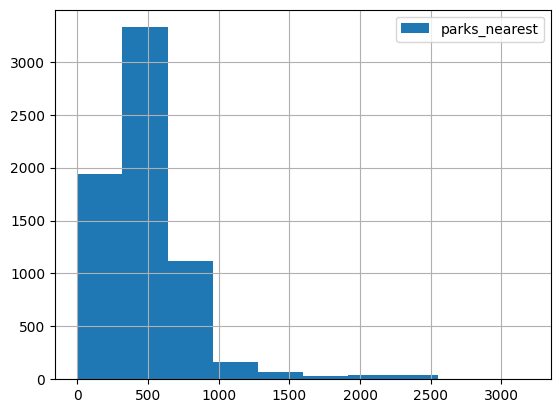

In [70]:
#Гистограмма по расстоянию до ближайшего парка

data['parks_nearest'].hist(legend=True)
plt.show()

Парки в среднем от 300 до 600 метров от объекта. Но так как много пропущенных значений, то выводы могут быть не точными.

### День недели публикации объявления

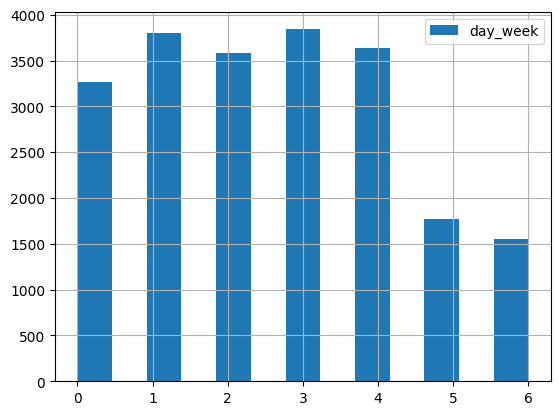

In [71]:
#Гистограмма по дню недели публикации объявления

data['day_week'].hist(bins=13, legend=True)
plt.show()

Наиболее активно размещают объявления по будним дням, чем в выходные. Самый пиковый - четверг.

### Месяц публикации объявления

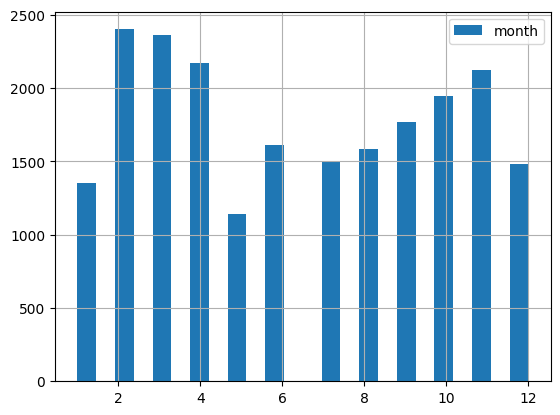

In [72]:
#Гистограмма по месяцу публикации объявления

data['month'].hist(bins=24, range=(1, 12), legend=True)
plt.show()

Самые результативные месяцы по размещению: февраль - апрель. В январе, мае и декабре менее всего размещают объявления о продаже. Летом активность возвращается и продолжает нарастать в течении всей осени.

### Как быстро продавались квартиры

Построим гистограмму для столбца days_exposition(сколько дней продавались квартиры)

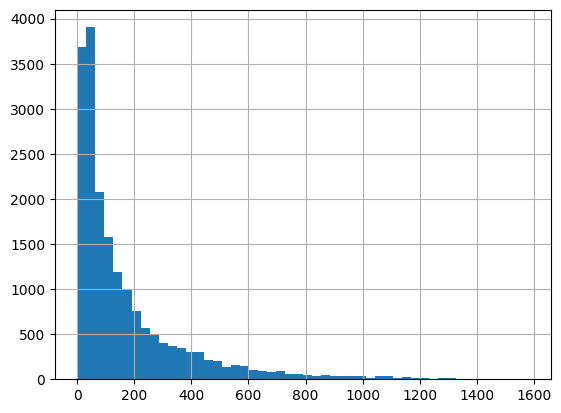

In [73]:
#Применим hist()

data['days_exposition'].hist(bins=50)
plt.show()

Из графика видно, что есть пик около 0. Исследуем природу появления сверхбыстрых продаж

In [74]:
#Посмотрим на основные показатели через describe()

round(data['days_exposition'].describe())

count    18786.0
mean       173.0
std        211.0
min          1.0
25%         44.0
50%         91.0
75%        218.0
max       1580.0
Name: days_exposition, dtype: float64

Видим, что стандартное отклонение велико, значит имеем большой разброс в данных.

Построим диаграмму размаха

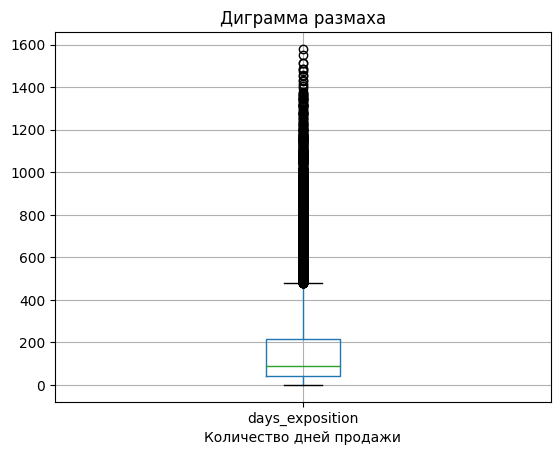

In [75]:
#Применим boxplot() к столбцу days_exposition и укажем дополнительные параметры вывода
#с помощью библиотеки matplotlib

data.boxplot('days_exposition')
plt.title('Диграмма размаха')
plt.xlabel('Количество дней продажи')
#plt.ylim(0, 800)
plt.show()

Видим, что "левый ус" упирается в 0. Удалим сверхдолгие продажи (> 470) и посмотрим как изменились данные.

In [76]:
days_exposition_filtered = data[data['days_exposition'] < 470]

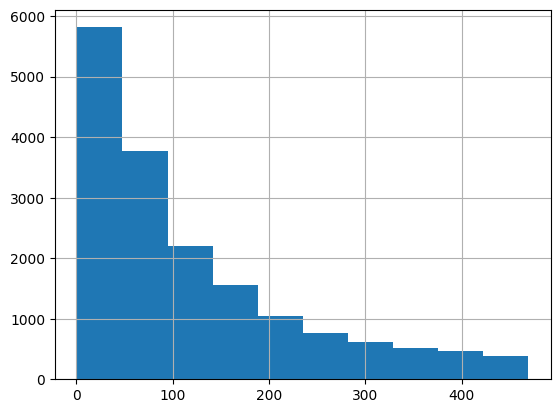

In [77]:
days_exposition_filtered['days_exposition'].hist()
plt.show()

In [78]:
days_exposition_filtered['days_exposition'].describe()

count    17147.00000
mean       120.22033
std        111.94195
min          1.00000
25%         39.00000
50%         79.00000
75%        172.00000
max        469.00000
Name: days_exposition, dtype: float64

Вывод:
- обычно на продажу недвижимости уходит 79 дней. Быстрыми продажи можно считать до первого квартиля, т.е до 39 дней, а необычно долгими более 172 дней.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта


Для этого построим графики зависимости цены от следующих параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Исследуем зависимость цены от общей площади

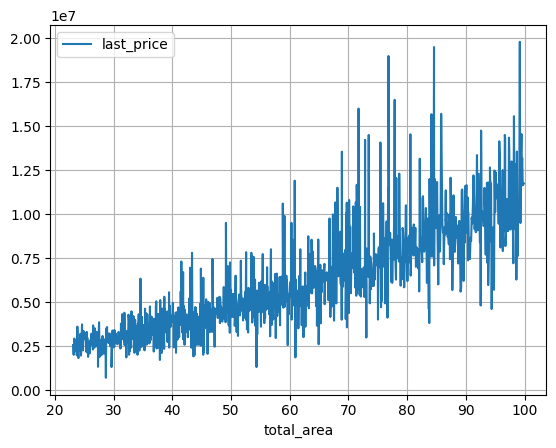

In [79]:
#Сформируем сводную таблицу и применим plot()

data.pivot_table(index='total_area', values='last_price').plot(grid=True)
plt.show()

Посчитаем коэффициент корреляции Пирсона:

In [80]:
data['last_price'].corr(data['total_area'])

0.685852715733085

Из графика видна линейная зависимость цены от общей площади. Что является логичным решением, чем больше квадратых метров, тем больше итоговая стоимость.

Исследуем зависимость цены от жилой площади

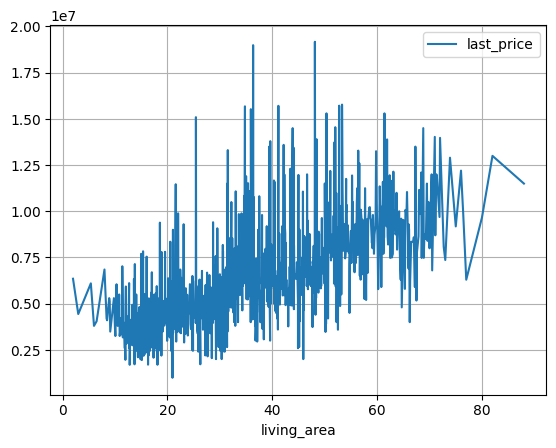

In [81]:
#Сформируем сводную таблицу и применим plot()

data.pivot_table(index='living_area', values='last_price').plot(grid=True)
plt.show()

Посчитаем коэффициент корреляции Пирсона:

In [82]:
data['last_price'].corr(data['living_area'])

0.534342380767285

График схож с предыдущим,но с небольшими изменениями.

Исследуем зависимость цены от площади кухни

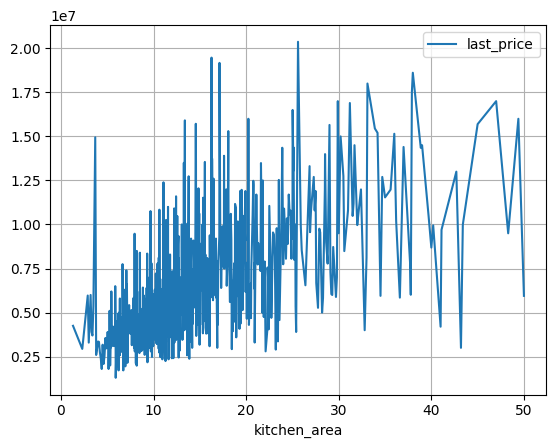

In [83]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True)
plt.show()

Посчитаем коэффициент корреляции Пирсона:

In [84]:
data['last_price'].corr(data['kitchen_area'])

0.5108609005644602

Исследуем зависимость цены от количества комнат

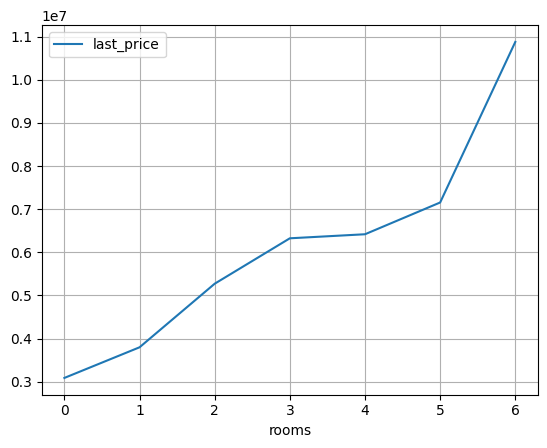

In [85]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True)
plt.show()

Видим интересную закономерность, между трех- и четырехкомнатными квартирами небольшая разница в цене. И сильно возрастает за 6 комнат в сравнении с 5 комнатами.

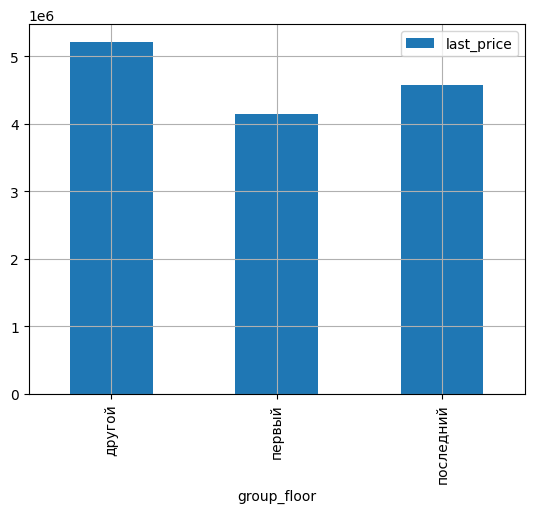

In [86]:
#Цена от этажа, на котором расположена квартира (первый, последний, другой)

data.pivot_table(index='group_floor', values='last_price').plot(kind='bar', grid=True)
plt.show()

Первый этаж дешевле на 20%, последний на 12% в отличии от остальных квартир.

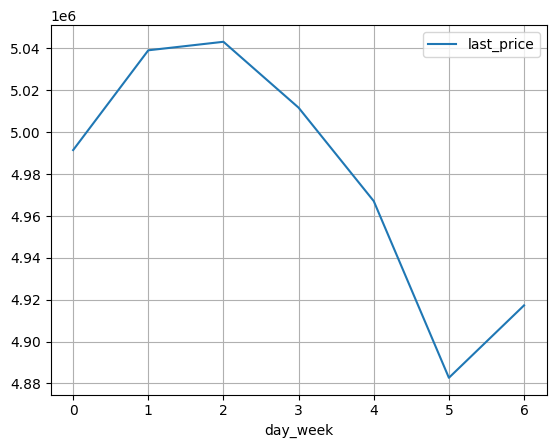

In [87]:
#Цена от дня недели размещения объявления

data.pivot_table(index='day_week', values='last_price').plot(grid=True)
plt.show()

Наиболее высокие цены предлагают по средам, к субботе аппетиты уменьшаются и в воскресенье, понедельник снова хотят продать подороже.

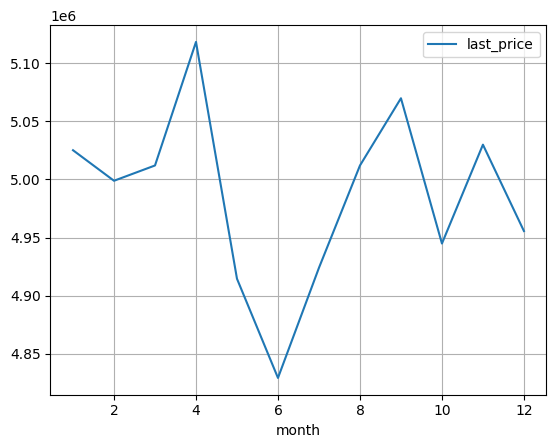

In [88]:
#Цена от месяца размещения объявления

data.pivot_table(index='month', values='last_price').plot(grid=True)
plt.show()

С января по февраль цена имеет тенденцию на уменьшение. Апрель является наиболее благоприятным периодом в году для продажи недвижимости. В мае,июне происходит значительное падение цен. Далее стоимость растет до сентября, а вот в октябре стагнируется. Но в ноябре снова удачное время для продажи.

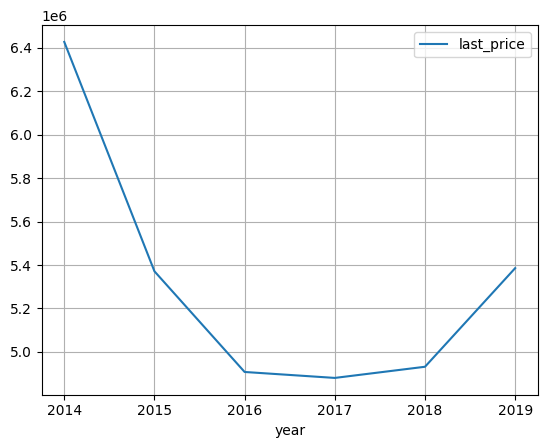

In [89]:
#Цена от года размещения объявления

data.pivot_table(index='year', values='last_price').plot(grid=True)
plt.show()

Самая дорогая недвижимость была в 2014 году, далее произошел обвал рынка и только с 2018 года снова начал показывать рост.

Наибольшая зависимость выявлена у цены и общей площади.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Создадим сводную таблицу с наименованием населенного пункта , а в значения укажем количество объявления и среднюю цену за м2. Запишем результат в новую переменную

In [90]:
ten_locality = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean'])

Переименуем столбцы

In [91]:
ten_locality.columns = ['count_square_meter', 'mean_price_square_meter']

Округлим и отсортируем по количеству

In [92]:
round(ten_locality.query('214 <= count_square_meter').sort_values('count_square_meter',ascending=False))

,count_square_meter,mean_price_square_meter
locality_name,,
Санкт-Петербург,13757,108527.0
Мурино,573,85818.0
Кудрово,462,95074.0
поселок Шушары,426,78461.0
Всеволожск,383,67075.0
Пушкин,331,101153.0
Колпино,330,75246.0
поселок Парголово,324,90495.0
Гатчина,301,68938.0


Построим столбчатую диаграмму.

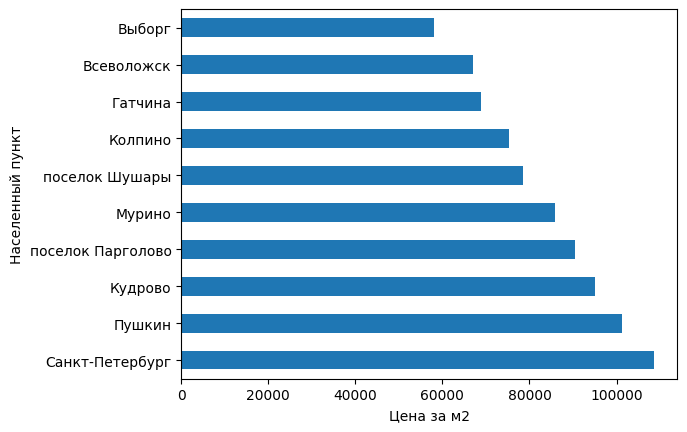

In [93]:
ten_locality.query('214 <= count_square_meter').sort_values('mean_price_square_meter',ascending=False).plot(y='mean_price_square_meter', kind='barh', legend=False)
#plt.title('Столбчатая диаграмма')
plt.xlabel('Цена за м2')
plt.ylabel('Населенный пункт')
plt.show()

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [94]:
round(ten_locality.query('214 <= count_square_meter & 
                         (locality_name == "Санкт-Петербург" | locality_name == "Выборг")').sort_values(
                         'count_square_meter',ascending=False))

SyntaxError: EOL while scanning string literal (4165610117.py, line 1)

Рассмотрим недвижимость в Санкт-Петербурге. Вычислим среднюю цену каждого километра в зависимости от удаленности квартиры от центра.

In [95]:
round(data[data['locality_name'] == "Санкт-Петербург"].pivot_table(index='cityCenters_nearest_in_km',
                                                                   values='last_price'))

,last_price
cityCenters_nearest_in_km,
0.0,8933333.0
1.0,9251088.0
2.0,8952554.0
3.0,7722448.0
4.0,8214069.0
5.0,8325327.0
6.0,7765705.0
7.0,7575998.0
8.0,7175072.0


Построим график зависимости цены от удаленности от центра.

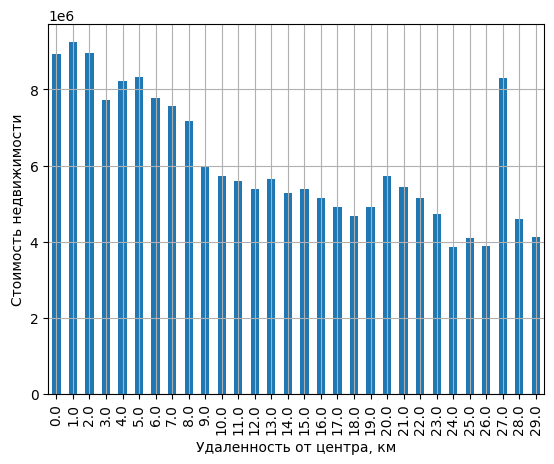

In [96]:
round(data[data['locality_name'] == "Санкт-Петербург"].pivot_table(index='cityCenters_nearest_in_km',
                                                                   values='last_price')).plot(kind='bar',
                                                                                              legend=False, 
                                                                                              grid=True)
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Стоимость недвижимости')
plt.show()

Изучим какие парметры могли повлиять на всплески на расстоянии 20 и 27 км.

Построим график зависимости общей площади от удаленности от центра.

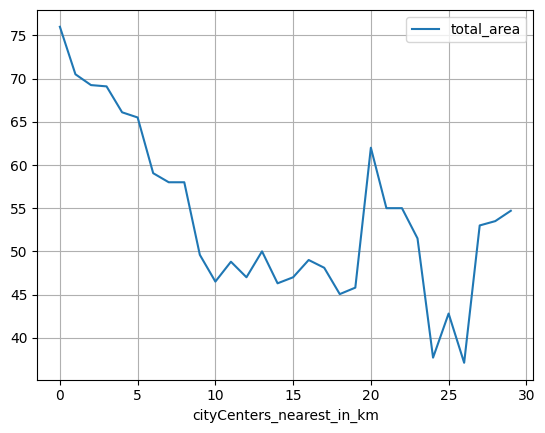

In [97]:
data[data['locality_name'] == "Санкт-Петербург"].pivot_table(index='cityCenters_nearest_in_km', 
                                                             values='total_area', aggfunc='median').plot(grid=True)
plt.show()

Построим график зависимости расположения парков в радиусе 3 км с недвижимостью от удаленности от центра.

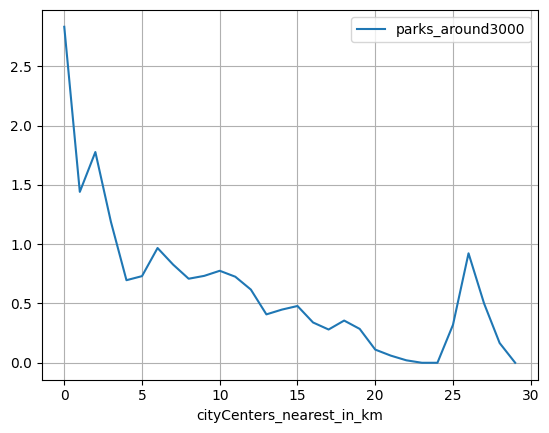

In [98]:
data[data['locality_name'] == "Санкт-Петербург"].pivot_table(index='cityCenters_nearest_in_km', 
                                                             values='parks_around3000').plot(grid=True)
plt.show()

- *Построим график зависимости расположения водоемов в радиусе 3 км с недвижимостью от удаленности от центра.*

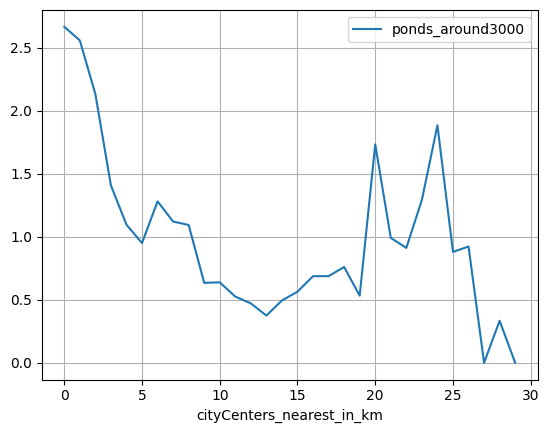

In [99]:
data[data['locality_name'] == "Санкт-Петербург"].pivot_table(index='cityCenters_nearest_in_km', 
                                                             values='ponds_around3000').plot(grid=True)
plt.show()

Вывод:
- по графику видно, что самая дорогая недвижимость находится в центре города и её стоимость уменьшается по мере удаления от него. Наиболее заметные аномалии находятся в районе 20-го и 27-го км. В этих зонах большая средняя общая площадь, а также рядом с 27км расположено больше "зеленых зон", а с 20-м - водоемов.

## Итоговый вывод

Было проведено исследование архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах сервиса Яндекс Недвижимость.

### Получены следующие наблюдения и обнаружены закономерности:

- общая площадь. Самый популярный метраж: 40 - 42 м2. Наиболее распространены квартиры от 31 до 61 м2.

- жилая площадь. Самые распространенные форматы: 15 - 19 м2, 27 - 35 м2 и 40 - 42 м2. Что сопоставимо со средними одно-, двух- и трехкомнатными объектами.

- площадь кухни. Типовый размер составляет 6 - 11 м2.

- цена недвижимости. Наиболее типичнная цена объекта в диапазоне 3 - 4,7 млн.рублей.

- количество комнат. Одно- , двух- и трехкомнатные самые востребованные.

- высота потолков. Золотой стандарт - потолки высотой 2,65 м.

- расположение квартиры на этаже. Чаще продаются квартиры с 1-го по 5-й этаж.

- общее количество этажей. Преобладают пяти-, девятиэтажные здания.

- наиболее распространены объекты в 10 - 17 км от центра города.

- в среднем аэропорт находится на расстоянии от 10 до 25 км от центра города.

- наиболее активно размещают объявления по будним дням.

- самые результативные месяцы по размещению: февраль - апрель. В январе, мае и декабре менее всего размещают объявления о продаже. Летом активность возвращается и продолжает нарастать в течении всей осени.

- количество дней с момента публикации объявления и до продажи. В среднем на продажу недвижимости уходит 79 дней. Быстрыми можно считать продажи до 39 дней, а необычно долгими более 172 дней.

### Факторы влияющие на стоимость жилья:

- общая площадь, жилая площадь и количество комнат имеют прямопропорциональную связь с ценой на объект продажи. Интересный факт: цена 3-х и 4-х комнатных квартир практически равна.

- первый этаж дешевле на 20%, а последний на 12% в отличии от остальных квартир.

- наиболее высокие цены предлагают по средам, к субботе они уменьшаются, а в воскресенье и понедельник снова наблюдается тенденция на удорожание.

- в апреле предлагается недвижимость по максимальной годовой стоимости, далее в лидерах сентябрь и на одном уровне в ноябре и январе. В июне наблюдается годовой минимум.

- самая дорогая недвижимость была в 2014 году, далее произошел обвал рынка и только с 2018 года снова начал показывать рост.

### Рейтинг из 10 населённых пунктов с наибольшим числом объявлений:

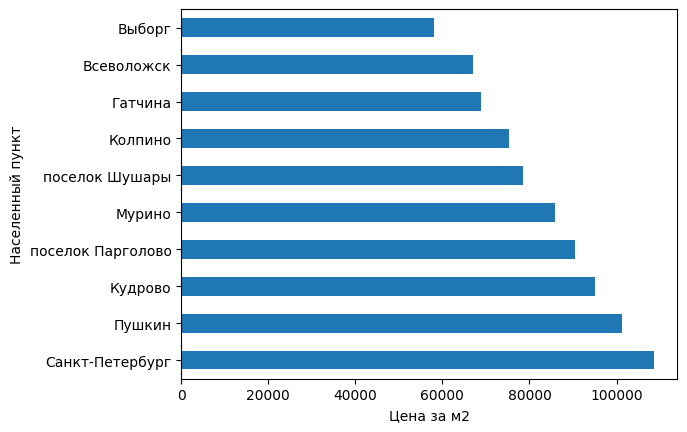

### Зависимость стоимости жилья от удаленности от центра города

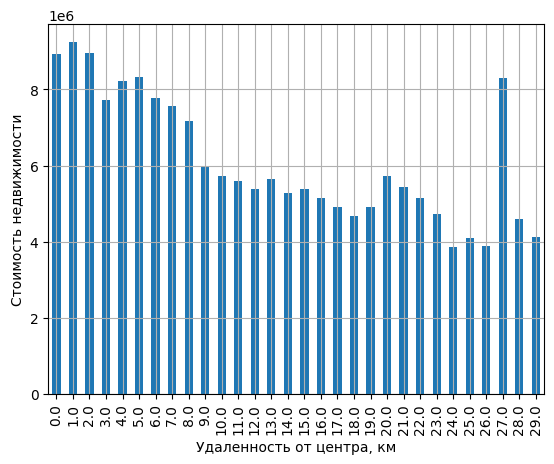

- cамая дорогая недвижимость находится в центре города и её стоимость уменьшается по мере удаления от него. В зоне 20-го и 27-го километров более высокая общая площадь жилья, рядом с 27км расположено больше парков, а с 20-м - водоемов. Все эти факторы повлияли на итоговую оценку стоимости квартир.